### Multi-Armed Bandit Strategies - Reinforcement Learning
The provided code is a Python script that demonstrates two different approaches to solving a multi-armed bandit problem. Multi-armed bandits are a class of reinforcement learning problems where an agent must choose from a set of actions (arms) to maximize their cumulative reward over time. In this script, we use two different strategies: the Upper Confidence Bound (UCB) and Thompson Sampling (Beta Distribution).

1. **UCB (Upper Confidence Bound):** This strategy employs the Upper Confidence Bound method to decide which ad to display. It aims to balance exploration and exploitation by selecting ads with the highest estimated upper bound of reward. The code reads a dataset from an Excel file and uses the UCB algorithm to select ads over a specified number of rounds (T). It then plots a histogram showing how often each ad was selected.

2. **Thompson Sampling:** This strategy uses the Thompson Sampling algorithm to choose ads. It models the reward distribution for each ad using Beta distributions and samples from these distributions to decide which ad to display. The code randomly selects ads over a specified number of rounds (N) using this approach and then plots a histogram of ad selections.

In [4]:
!pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     -------------------------------------- - 92.2/96.5 kB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 96.5/96.5 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_excel('Dataset_master.xlsx', sheet_name='Upper Confidence Bound Facebook') 

In [8]:
df.head()

,Advertisement 1,Advertisement 2,Advertisement 3,Advertisement 4,Advertisement 5,Advertisement 6,Advertisement 7,Advertisement 8,Advertisement 9,Advertisement 10
0,0,0,0,1,0,1,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [10]:
import math
T = 200
num_ads = 10
ads_selected = []
numbers_of_selections = [0] * num_ads
sums_of_rewards = [0] * num_ads
total_reward = 0

for n in range(0, T):
  ad = 0
  max_upper_bound = 0
  for i in range(0, num_ads):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = df.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

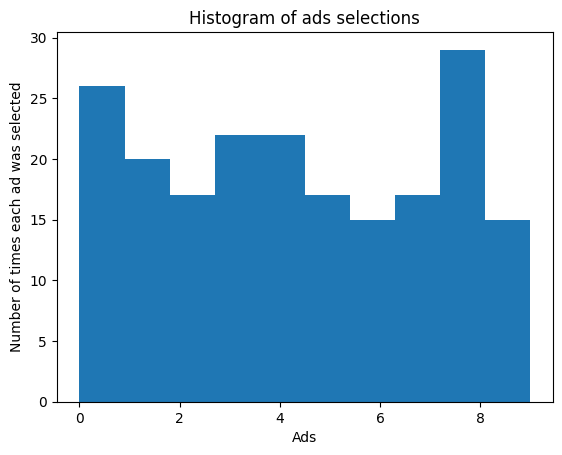

In [11]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [12]:
import random
N = 15000
num_ads = 10
ads_selected = []
num_of_rewards_1 = [0] * num_ads
num_of_rewards_0 = [0] * num_ads
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, num_ads):
    random_beta = random.betavariate(num_of_rewards_1[i] + 1, num_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = df.values[n, ad]
  if reward == 1:
    num_of_rewards_1[ad] = num_of_rewards_1[ad] + 1
  else:
    num_of_rewards_0[ad] = num_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

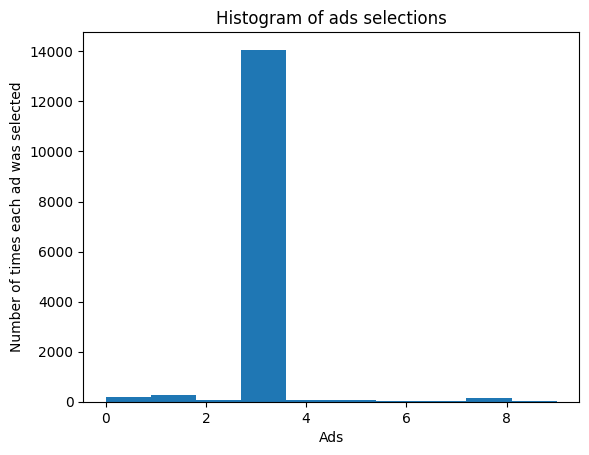

In [13]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()